<a href="https://colab.research.google.com/github/25aswada/Colab/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to the folder containing the uploaded image folders
base_path = '/content/drive/MyDrive/All Dementia/'

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

folders = ['Non-Dementia', 'Moderate', 'Mild', 'Very-Mild']
images = []
labels = []

for folder in folders:
    folder_path = os.path.join(base_path, folder)
    folder_images = load_images_from_folder(folder_path)
    images.extend(folder_images)
    labels.extend([folder] * len(folder_images))

# Create DataFrame
data = pd.DataFrame({'image': images, 'label': labels})

def display_image(idx):
    plt.imshow(data['image'][idx], cmap='gray')
    plt.title(data['label'][idx])
    plt.axis('off')
    plt.show()
def display_image(idx):
    plt.imshow(data['image'][idx], cmap='gray')
    plt.title(data['label'][idx])
    plt.axis('off')
    plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


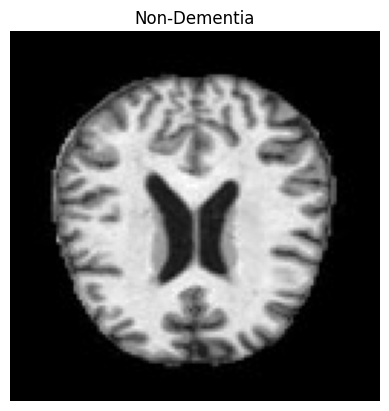

In [3]:
display_image(544)

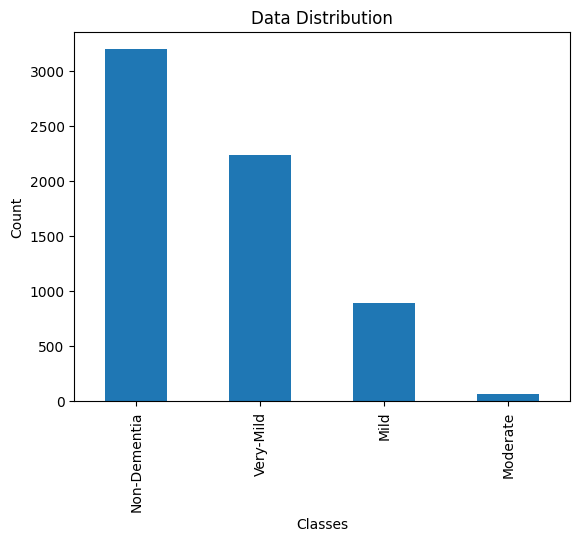

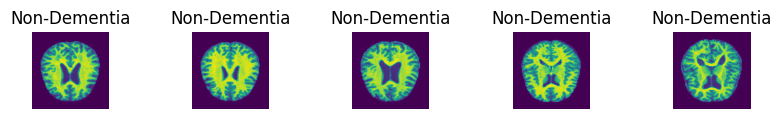

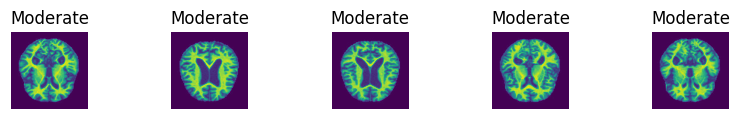

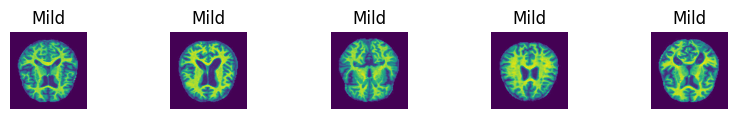

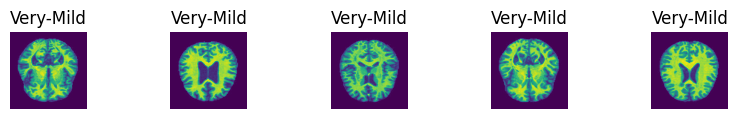

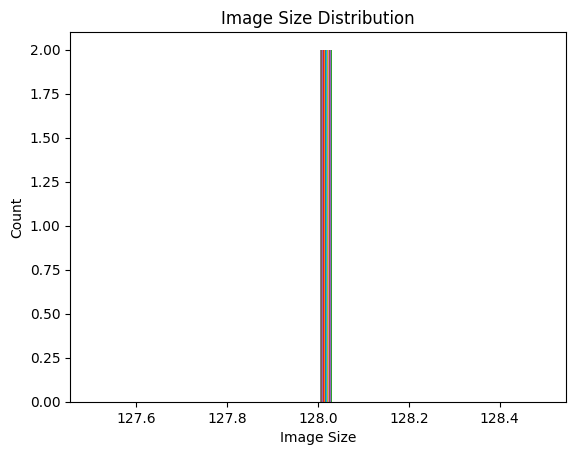

In [4]:
# 1. Data Distribution Visualization
data['label'].value_counts().plot(kind='bar')
plt.title('Data Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()

# 2. Sample Image Visualization
def display_sample_images_per_class(num_samples=5):
    classes = data['label'].unique()
    for label in classes:
        plt.figure(figsize=(10, 1))
        sample_images = data[data['label'] == label]['image'].sample(num_samples)
        for i, image in enumerate(sample_images):
            plt.subplot(1, num_samples, i+1)
            plt.imshow(image)
            plt.title(label)
            plt.axis('off')
        plt.show()

display_sample_images_per_class()

# 3. Image Size Distribution
image_sizes = data['image'].apply(lambda x: x.size)
plt.hist(image_sizes, bins=30)
plt.title('Image Size Distribution')
plt.xlabel('Image Size')
plt.ylabel('Count')
plt.show()


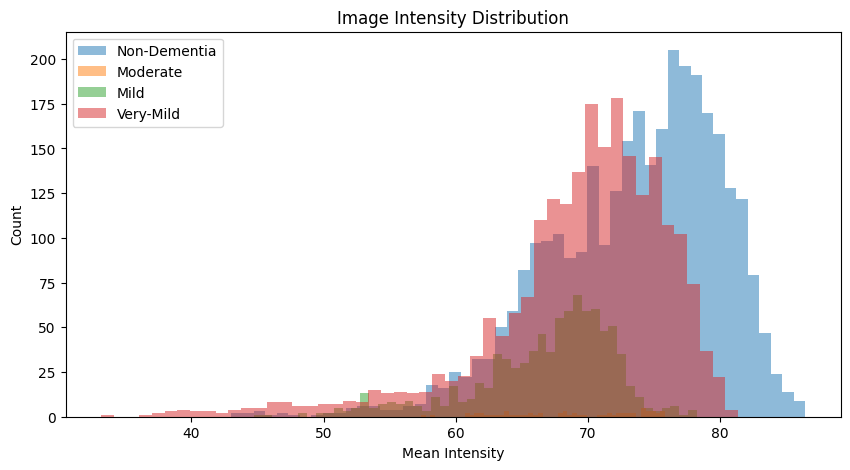

In [5]:
import numpy as np

# 1. Image Intensity Analysis
def calculate_image_intensity_stats(images):
    intensity_stats = {'mean_intensity': [], 'std_intensity': []}
    for image in images:
        intensity_stats['mean_intensity'].append(np.mean(image))
        intensity_stats['std_intensity'].append(np.std(image))
    return intensity_stats

def plot_intensity_distribution(intensity_stats, labels):
    plt.figure(figsize=(10, 5))
    for label in labels:
        plt.hist(intensity_stats[label]['mean_intensity'], bins=50, alpha=0.5, label=label)
    plt.title('Image Intensity Distribution')
    plt.xlabel('Mean Intensity')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

# Calculate intensity statistics for each class
intensity_stats = {}
for label in data['label'].unique():
    label_images = data[data['label'] == label]['image']
    intensity_stats[label] = calculate_image_intensity_stats(label_images)

# Plot intensity distribution for each class
plot_intensity_distribution(intensity_stats, data['label'].unique())


This code will compute the mean and standard deviation of pixel intensities for each image in your dataset, separated by class labels. Then, it will plot the distribution of mean intensities for each class to visualize any differences in image intensity distributions across classes.

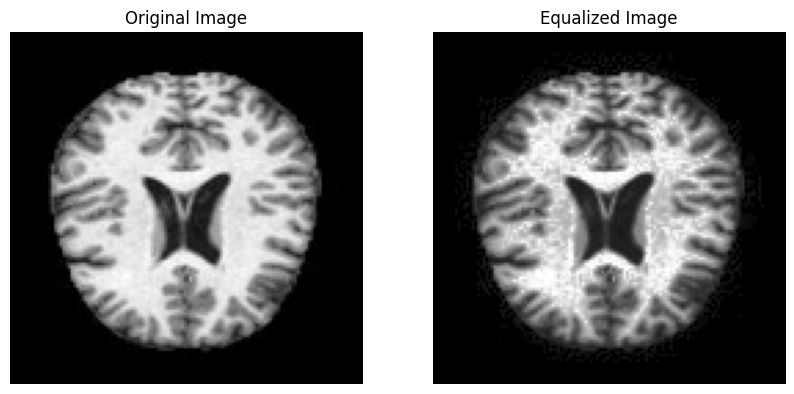

In [6]:
from skimage import exposure

def histogram_equalization(images):
    equalized_images = []
    for image in images:
        # Convert image to numpy array
        img_array = np.array(image)
        # Apply histogram equalization
        equalized_img_array = exposure.equalize_hist(img_array)
        # Convert back to PIL image
        equalized_img = Image.fromarray((equalized_img_array * 255).astype(np.uint8))
        equalized_images.append(equalized_img)
    return equalized_images

# Apply histogram equalization to all images
equalized_images = histogram_equalization(images)

# Display original and equalized images
def display_comparison(original_img, equalized_img):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(original_img, cmap='gray')  # Display original image in grayscale
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(equalized_img, cmap='gray')  # Display equalized image in grayscale
    axes[1].set_title('Equalized Image')
    axes[1].axis('off')
    plt.show()


# Choose an example image to display
example_index = 0

# Display comparison
display_comparison(images[example_index], equalized_images[example_index])


Histogram equalization improves image contrast by redistributing pixel intensity values, resulting in a more balanced distribution across the intensity range. This enhances visual quality, making details more distinguishable, which is particularly useful in tasks like medical imaging and object detection. Additionally, it normalizes intensity distributions, aiding in image comparison and analysis in applications such as image registration.

In [7]:
from skimage.feature import greycomatrix, greycoprops

def calculate_texture_features(images):
    texture_features = []
    for image in images:
        # Convert image to grayscale
        gray_image = np.array(image.convert('L'))
        # Compute GLCM (Grey-Level Co-occurrence Matrix)
        glcm = greycomatrix(gray_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
        # Compute texture properties from GLCM
        contrast = greycoprops(glcm, 'contrast')[0, 0]
        correlation = greycoprops(glcm, 'correlation')[0, 0]
        energy = greycoprops(glcm, 'energy')[0, 0]
        homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]
        texture_features.append({'contrast': contrast, 'correlation': correlation, 'energy': energy, 'homogeneity': homogeneity})
    return texture_features

# Calculate texture features for all images
texture_features = calculate_texture_features(images)

# Convert texture features to DataFrame for analysis
texture_df = pd.DataFrame(texture_features)

# Display the texture features DataFrame
print("Texture Features:")
print(texture_df)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1

Texture Features:
        contrast  correlation    energy  homogeneity
0     269.090551     0.983969  0.423526     0.492197
1     294.617495     0.981197  0.424851     0.493589
2     288.633981     0.982025  0.416383     0.488136
3     296.165969     0.981345  0.414999     0.489213
4     304.308686     0.983558  0.438856     0.517331
...          ...          ...       ...          ...
6395  347.267224     0.972897  0.393247     0.452789
6396  269.113804     0.980870  0.393332     0.459861
6397  304.328986     0.977401  0.393921     0.456853
6398  351.421875     0.974525  0.395710     0.454629
6399  349.435039     0.967481  0.389160     0.456041

[6400 rows x 4 columns]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1

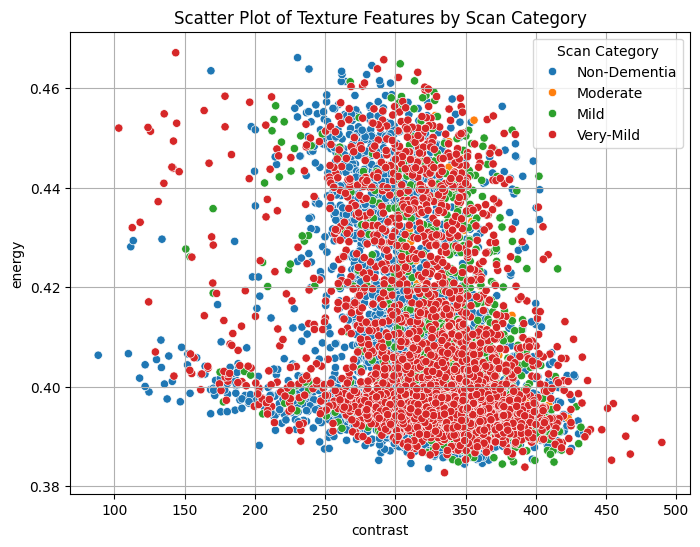

In [8]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns  # Add this import

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to the folder containing the uploaded image folders
base_path = '/content/drive/MyDrive/All Dementia'

# Function to load images from a folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

# Load images from each subfolder
folders = ['Non-Dementia', 'Moderate', 'Mild', 'Very-Mild']
images = []
labels = []

for folder in folders:
    folder_path = os.path.join(base_path, folder)
    folder_images = load_images_from_folder(folder_path)
    images.extend(folder_images)
    labels.extend([folder] * len(folder_images))

# Function to calculate texture features
def calculate_texture_features(images):
    texture_features = []
    for image in images:
        # Convert image to grayscale
        gray_image = np.array(image.convert('L'))
        # Compute GLCM (Grey-Level Co-occurrence Matrix)
        glcm = greycomatrix(gray_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
        # Compute texture properties from GLCM
        contrast = greycoprops(glcm, 'contrast')[0, 0]
        energy = greycoprops(glcm, 'energy')[0, 0]
        # Append texture features to list
        texture_features.append({'contrast': contrast, 'energy': energy})
    return texture_features

# Calculate texture features for all images
texture_features = calculate_texture_features(images)

# Combine texture features and labels into a DataFrame
texture_df = pd.DataFrame(texture_features)
texture_df['label'] = labels

# Create a scatter plot with different colors for each category
feature1 = 'contrast'
feature2 = 'energy'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=feature1, y=feature2, hue='label', palette='tab10', data=texture_df)
plt.title('Scatter Plot of Texture Features by Scan Category')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.grid(True)
plt.legend(title='Scan Category')
plt.show()


Energy, also known as angular second moment, is a measure of the uniformity or homogeneity of pixel intensities in an image. It quantifies the level of uniformity in the GLCM and is calculated as the sum of squared elements in the GLCM. A higher energy value indicates a more uniform distribution of pixel intensities, while a lower value indicates greater variability or texture complexity.

Contrast measures the local variations in pixel intensities within an image. It quantifies the difference in intensity between a pixel and its neighboring pixels. In the GLCM context, contrast is calculated as the sum of squared differences between the intensity values of neighboring pixels and their corresponding frequencies in the GLCM. A higher contrast value indicates greater intensity variation or texture heterogeneity, while a lower value suggests a more uniform distribution of intensities.

In [9]:
import os
import pandas as pd
import numpy as np
from PIL import Image

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to the folder containing the uploaded image folders
base_path = '/content/drive/MyDrive/All Dementia'

# Function to load images from a folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

# Load images from each subfolder
folders = ['Non-Dementia', 'Moderate', 'Mild', 'Very-Mild']
images = []
labels = []

for folder in folders:
    folder_path = os.path.join(base_path, folder)
    folder_images = load_images_from_folder(folder_path)
    images.extend(folder_images)
    labels.extend([folder] * len(folder_images))



print(np.array(images[0]).shape)

 # Function to extract pixel values and flatten them into a 1D array
def image_to_pixels(image):
     return np.array(image).flatten()

# Convert images to pixel arrays
pixel_arrays = [image_to_pixels(img) for img in images]

# # Convert pixel arrays to DataFrame
data = pd.DataFrame(pixel_arrays)

# # Add label column to DataFrame
data['label'] = labels

# # Display the DataFrame
print(data.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(128, 128)
   0  1  2  3  4  5  6  7  8  9  ...  16375  16376  16377  16378  16379  \
0  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
1  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
2  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
3  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
4  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   

   16380  16381  16382  16383         label  
0      0      0      0      0  Non-Dementia  
1      0      0      0      0  Non-Dementia  
2      0      0      0      0  Non-Dementia  
3      0      0      0      0  Non-Dementia  
4      0      0      0      0  Non-Dementia  

[5 rows x 16385 columns]


In [10]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam

# Split the data into training and validation sets
train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

print(data)

# # Extract features (pixel arrays) and labels from the training and validation data
X_train = np.stack(train_data.drop('label', axis=1).values)
print(X_train.shape)
y_train = train_data['label'].values
print(y_train.shape)
X_val = np.stack(val_data.drop('label', axis=1).values)
print(X_val.shape)
y_val = val_data['label'].values
print(y_val.shape)

# Scale pixel values to the range [0, 1]
X_train = X_train / 255.0
X_val = X_val / 255.0

print(X_train.shape)
print(X_val.shape)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)



# Define the input shape
input_shape = (128, 128, 1)

learning_rate = 0.001

# Define a Sequential model
model = Sequential()

# Add layers to the model
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))  # Output layer

optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

# Display model summary
model.summary()

X_train = X_train.reshape(-1, 128, 128, 1)
X_val = X_val.reshape(-1, 128, 128, 1)

# Train the model
history = model.fit(X_train, y_train_encoded,
                   epochs=20,
                   validation_data=(X_val, y_val_encoded))

# # Evaluate the model
# loss, accuracy = model.evaluate(X_val, y_val_encoded)
# print(f"Validation Loss: {loss:.4f}")
# print(f"Validation Accuracy: {accuracy:.4f}")


      0  1  2  3  4  5  6  7  8  9  ...  16375  16376  16377  16378  16379  \
0     0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
1     0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
2     0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
3     0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
4     0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
...  .. .. .. .. .. .. .. .. .. ..  ...    ...    ...    ...    ...    ...   
6395  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
6396  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
6397  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
6398  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   
6399  0  0  0  0  0  0  0  0  0  0  ...      0      0      0      0      0   

      16380  16381  16382  16383         label  
0         0   

In [11]:
# Display only the image number (first column) and the label (last column)
print(val_data[[val_data.columns[0], 'label']].head(20))

# Display only the image number (first column) and the label (last column) where label is "Moderate"
print(val_data[val_data['label'] == 'Moderate'][[val_data.columns[0], 'label']].head(10))


      0         label
1992  0  Non-Dementia
2775  0  Non-Dementia
4162  0     Very-Mild
5502  0     Very-Mild
132   0  Non-Dementia
2991  0  Non-Dementia
4913  0     Very-Mild
2095  0  Non-Dementia
2164  0  Non-Dementia
4586  0     Very-Mild
3664  0          Mild
5765  0     Very-Mild
1357  0  Non-Dementia
4987  0     Very-Mild
535   0  Non-Dementia
538   0  Non-Dementia
3816  0          Mild
1039  0  Non-Dementia
4947  0     Very-Mild
296   0  Non-Dementia
      0     label
3263  0  Moderate
3211  0  Moderate
3246  0  Moderate
3260  0  Moderate
3252  0  Moderate
3210  0  Moderate
3221  0  Moderate
3213  0  Moderate
3258  0  Moderate
3206  0  Moderate


*   For Non-Dementia: Number stays the same
*   For Moderate: item number - 3200
*   For Mild: item number - 3263
*   For Very-Mild: item number - 4159

In [12]:
from PIL import Image
import numpy as np

# Load the image from your computer
image_path = '/content/drive/MyDrive/All Dementia/Very-Mild/verymild_1606.jpg'
img = Image.open(image_path)

# Preprocess the image
# Resize the image to match the input size of your model
img = img.resize((128, 128))
# Convert the image to grayscale
img = img.convert('L')
# Convert the image to a numpy array
img_array = np.array(img)
# Expand the dimensions to match the input shape of your model
img_array = np.expand_dims(img_array, axis=0)
# Normalize pixel values to the range [0, 1]
img_array = img_array / 255.0

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class label
predicted_class_index = np.argmax(predictions)
predicted_class = label_encoder.classes_[predicted_class_index]

print("Predicted class:", predicted_class)




1/1 [==============================] - 0s 168ms/step
Predicted class: Very-Mild


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the validation data
val_predictions = model.predict(X_val)

# Convert predicted labels back to original class names
val_predicted_labels = label_encoder.inverse_transform(np.argmax(val_predictions, axis=1))

# Calculate accuracy
accuracy = accuracy_score(y_val, val_predicted_labels)

# Calculate precision
precision = precision_score(y_val, val_predicted_labels, average='weighted')

# Calculate recall
recall = recall_score(y_val, val_predicted_labels, average='weighted')

# Calculate F1-score
f1 = f1_score(y_val, val_predicted_labels, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)



40/40 [==============================] - 11s 266ms/step
Accuracy: 0.98828125
Precision: 0.9883205706376877
Recall: 0.98828125
F1-Score: 0.9882317086450317


40/40 [==============================] - 9s 217ms/step


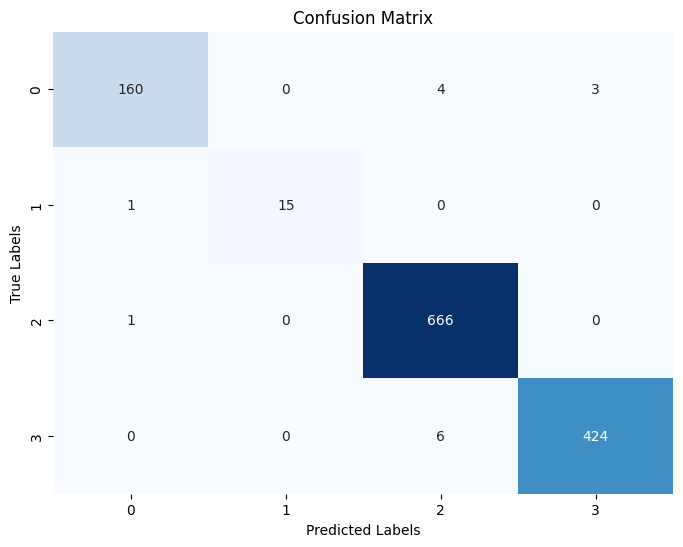

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Generate predictions for validation data
y_val_pred_prob = model.predict(X_val)
y_val_pred = np.argmax(y_val_pred_prob, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_val_encoded, y_val_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


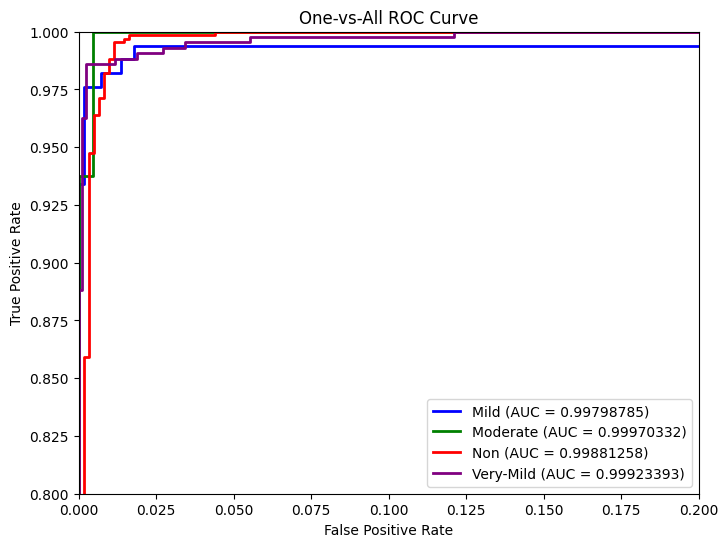

In [15]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Convert labels to binary format
y_val_bin = label_binarize(y_val_encoded, classes=[0, 1, 2, 3])  # Adjust number of classes if needed

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):  # Assuming 4 classes
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], y_val_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Define the actual class names
class_names = ['Mild', 'Moderate', 'Non', 'Very-Mild']

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'green', 'red', 'purple'])  # Add more colors if needed
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'{class_names [i]} (AUC = {roc_auc[i]:.8f})')  # Specify precision


# Remaining plotting code remains the same


plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-All ROC Curve')
plt.legend(loc='lower right')
plt.xlim([0.0, 0.2])  # Adjust as needed
plt.ylim([0.8, 1.0])  # Adjust as needed
plt.show()


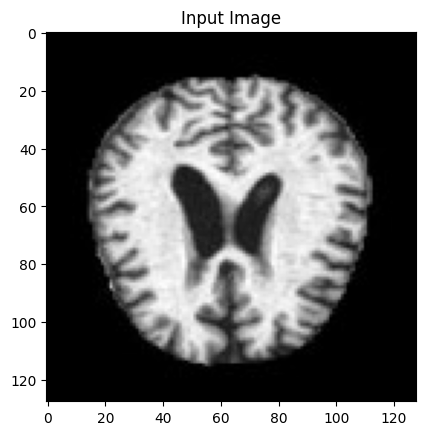

1/1 [==============================] - 0s 223ms/step


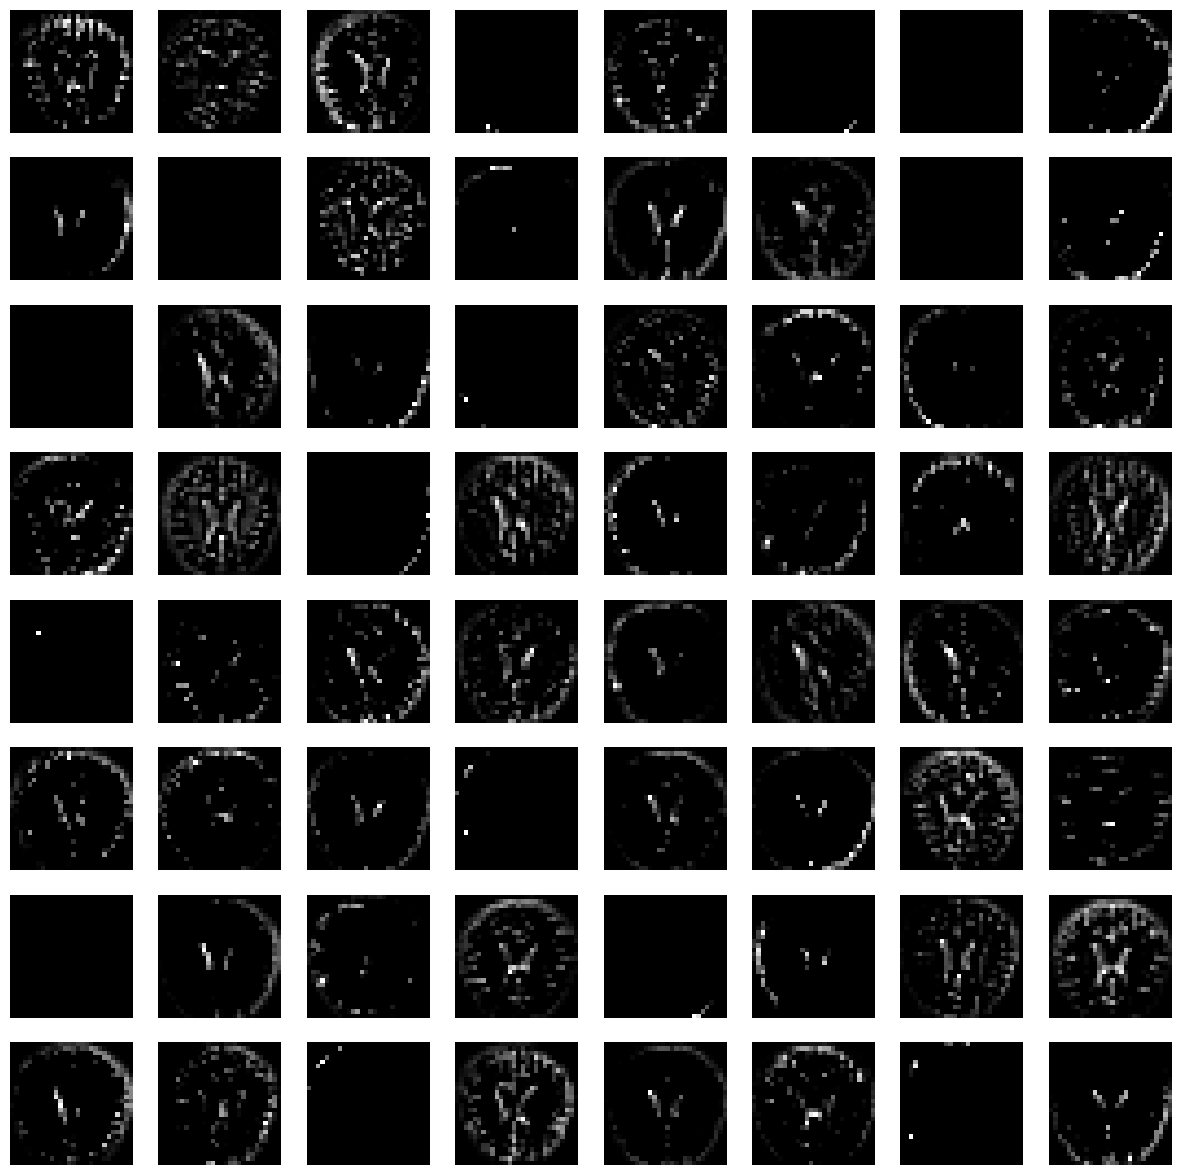

In [19]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load a sample image and preprocess it
img_path = '/moderate_2.jpg'  # Replace with the path to your MRI image
img = image.load_img(img_path, target_size=(128, 128), color_mode='grayscale')
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)  # Add batch dimension
img_tensor /= 255.0  # Scale pixel values to [0, 1]

# Visualize the input image
plt.imshow(img_tensor[0, :, :, 0], cmap='gray')
plt.title('Input Image')
plt.show()

# Choose a convolutional layer to visualize
layer_name = 'conv2d_2'  # Change this to the actual layer name you want to visualize
layer = model.get_layer(name=layer_name)

# Create a new model that outputs the activations of the selected layer
intermediate_layer_model = tf.keras.models.Model(inputs=model.input, outputs=layer.output)

# Generate the feature maps for the input image
feature_maps = intermediate_layer_model.predict(img_tensor)

# Visualize the feature maps
def plot_feature_maps(feature_maps):
    num_filters = feature_maps.shape[-1]
    size = feature_maps.shape[1]

    # Plot the feature maps in a grid
    cols = 8
    rows = num_filters // cols
    fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

    for i in range(num_filters):
        row = i // cols
        col = i % cols
        ax = axes[row, col]
        ax.imshow(feature_maps[0, :, :, i], cmap='gray')
        ax.axis('off')

    plt.show()

plot_feature_maps(feature_maps)
